In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
metrics_data = pd.read_csv("metrics-data.csv")
metrics_data

,model,epoch,loss,precision,recall,f1,accuracy
0,distilbert,0,0.7940,0.5318,0.3167,0.3970,0.7280
1,distilbert,1,0.6769,0.5076,0.4551,0.4799,0.7657
2,distilbert,2,0.6771,0.5045,0.4581,0.4801,0.7641
3,bert,0,0.7522,0.4864,0.4103,0.4451,0.7219
4,bert,1,0.6973,0.4825,0.5260,0.5033,0.7407
5,bert,2,0.6892,0.4920,0.5220,0.5065,0.7461
6,bert-weights,0,0.7735,0.4537,0.6552,0.5361,0.7341
7,bert-weights,1,0.7336,0.4704,0.6812,0.5565,0.7572
8,bert-weights,2,0.6972,0.4980,0.6753,0.5733,0.7697
9,bert-weights,3,0.6736,0.5492,0.6583,0.5988,0.8013


In [4]:
accuracy = metrics_data.drop(["loss","precision","recall","f1"],axis=1).rename(columns={"accuracy":"values","model":"column"})
precision = metrics_data.drop(["loss","accuracy","recall","f1"],axis=1).rename(columns={"precision":"values","model":"column"})
recall = metrics_data.drop(["loss","precision","accuracy","f1"],axis=1).rename(columns={"recall":"values","model":"column"})
#loss = metrics_data.drop(["accuracy","precision","recall","f1"],axis=1).rename(columns={"loss":"values","model":"column"})
#f1 = metrics_data.drop(["loss","precision","recall","accuracy"],axis=1).rename(columns={"f1":"values","model":"column"})

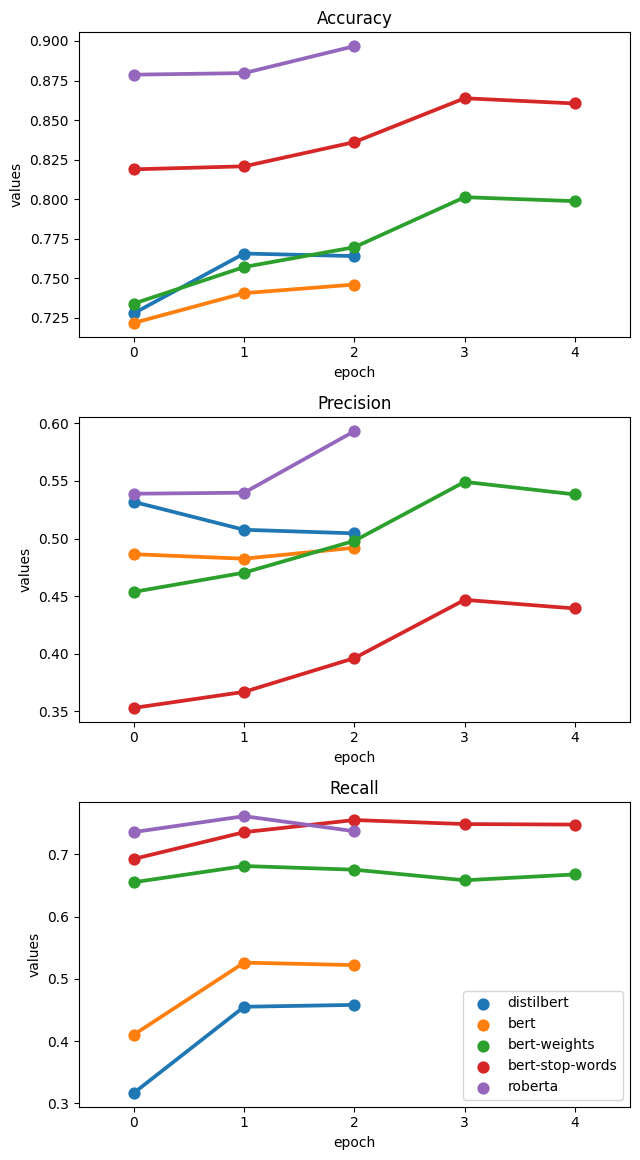

In [27]:
res = 1.3
fig, axes = plt.subplots(3, 1, figsize=(5*res, 9*res))
axes = axes.ravel()

plt1 = sns.pointplot(ax=axes[0], data = accuracy, x = "epoch", y="values", hue="column")
plt3 = sns.pointplot(ax=axes[1], data = precision, x = "epoch", y="values", hue="column")
plt4 = sns.pointplot(ax=axes[2], data = recall, x = "epoch", y="values", hue="column")
#plt2 = sns.pointplot(ax=axes[1], data = loss, x = "epoch", y="values", hue="column")
#plt5 = sns.pointplot(ax=axes[4], data = f1, x = "epoch", y="values", hue="column")

plt1.legend([],[], frameon=False)
plt1.set_title("Accuracy")
plt3.legend([],[], frameon=False)
plt3.set_title("Precision")
#plt4.legend([],[], frameon=False)
plt4.set_title("Recall")
#plt2.legend([],[], frameon=False)
#plt2.set_title("Loss")
#plt5.legend([],[], frameon=False)
#plt5.set_title("F1 Score")


handles, labels = plt4.get_legend_handles_labels()
plt4.legend(handles=handles[0:], labels=labels[0:])
plt.setp(plt4.get_legend().get_texts(), fontsize='10')
#plt.setp(plt4.get_legend().get_title(), fontsize='10')
#lines, labels = fig.axes[-1].get_legend_handles_labels()
#legend = fig.legend(lines,labels,loc="lower right",bbox_to_anchor=(0.9, 0.1), ncol=1)
#frame = legend.get_frame()
#frame.set_edgecolor('0.5')

plt.tight_layout()
plt.show()

In [2]:
label_metric= [[52,3,7,2],
                [2,28,2,0],
                [5,2,25,12],
                [1,1,9,40]]

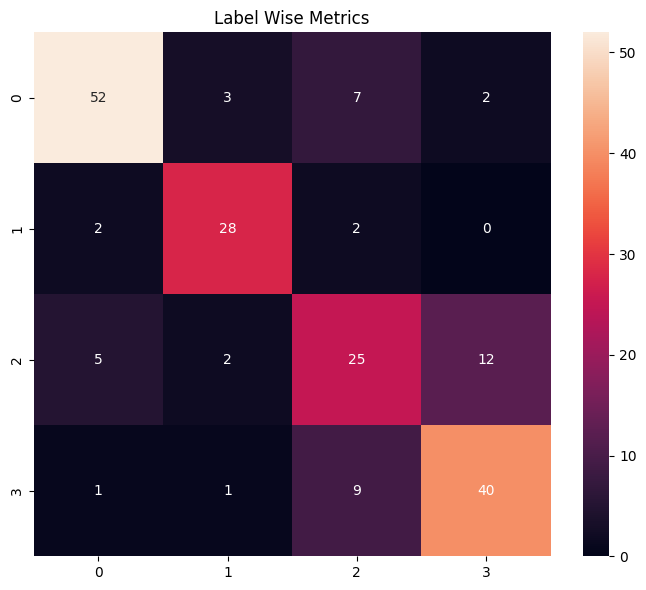

In [7]:
plt.figure(figsize=(7,6))
plt.title("Label Wise Metrics")

sns.heatmap(data=label_metrics,annot=True)

plt.tight_layout()
plt.show()

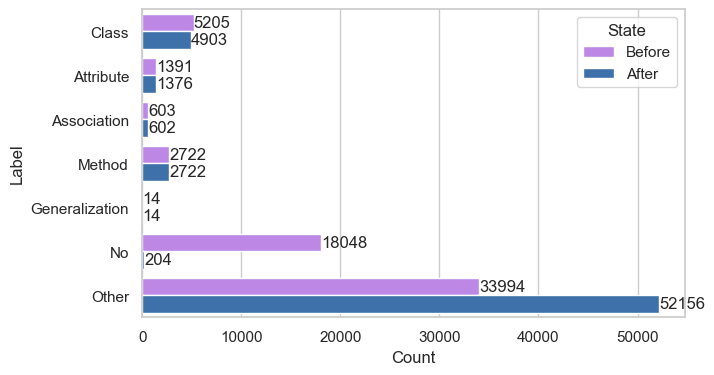

In [86]:
label = ["Class","Attribute","Association", "Method","Generalization","No","Other"] 
initial = [4893+312, 1311+80, 579+24, 2412+310, 14, 6778+11270,33994]
final = [4604+299, 1299+77, 580+22, 2419+303, 14, 102+102, 52156]

plt.figure(figsize=(7, 4))
df = pd.DataFrame(list(zip(label, initial, final)),columns =['Label', 'Before', 'After'])
df = pd.melt(df, id_vars="Label", var_name="State", value_name="count")

ax = sns.barplot(data=df,y="Label",x="count",hue="State",palette=[sns.xkcd_rgb['light purple'],sns.xkcd_rgb['medium blue']])
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()